In [1]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")
import nolearn
from nolearn.lasagne import NeuralNet
import readdata
import lasagne
from lasagne import layers
from sklearn import metrics
import detectobjects as det
import os.path
from scipy import misc
import cv2
from progress_bar import ProgressBar
import shapefeatures
from sklearn import ensemble

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
opts = {'img_dir': 'data/plasmodium-images/images/',
        'annotation_dir': 'data/plasmodium-images/annotation/',
        'detection_probability_threshold': 0.5,
        'detection_overlap_threshold': 0.3, 
        'gauss': 1,
        'patch_size': (50,50),
        'image_downsample' : 2,
        'detection_step': 5,
        'patch_creation_step': 40,
        'object_class': None,
        'negative_training_discard_rate': .9
       }
opts['patch_stride_training'] = int(opts['patch_size'][0]*.25)

In [3]:
trainfiles, valfiles, testfiles = readdata.create_sets(opts['img_dir'], train_set_proportion=.5, 
                                                  test_set_proportion=.5,
                                                  val_set_proportion=0)

train_y, train_X = readdata.create_patches(trainfiles, opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])
test_y, test_X = readdata.create_patches(testfiles,  opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])

# Cut down on disproportionately large numbers of negative patches
train_X, train_y = readdata.balance(train_X, train_y, mult_neg=100)
#test_X, test_y = readdata.balance(test_X, test_y, mult_neg=100)

# Create rotated and flipped versions of the positive patches
train_X, train_y = readdata.augment_positives(train_X, train_y)
test_X, test_y = readdata.augment_positives(test_X, test_y)

print '\n'
print '%d positive training examples, %d negative training examples' % (sum(train_y), len(train_y)-sum(train_y))
print '%d positive testing examples, %d negative testing examples' % (sum(test_y), len(test_y)-sum(test_y))
print '%d patches (%.1f%% positive)' % (len(train_y)+len(test_y), 100.*((sum(train_y)+sum(test_y))/(len(train_y)+len(test_y))))

('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('te

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 19)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6da5c68>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 19)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7fc5f6ccef38>, None)
('test1:', 18)
('\r

MemoryError: 

View a random selection of positive and negative patches to see if they look right

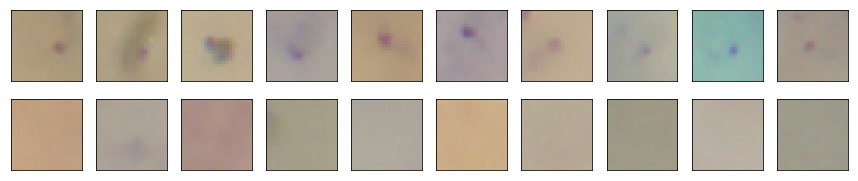

In [4]:
N_samples_to_display = 10
pos_indices = np.where(test_y)[0]
pos_indices = pos_indices[np.random.permutation(len(pos_indices))]
for i in range(N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_pos = test_X[pos_indices[i],:,:,:]
    example_pos = np.swapaxes(example_pos,0,2)
    plt.imshow(example_pos)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

neg_indices = np.where(test_y==0)[0]
neg_indices = neg_indices[np.random.permutation(len(neg_indices))]
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[neg_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.gcf().set_size_inches(1.5*N_samples_to_display,3)

### CNN training

In [5]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('conv2', layers.Conv2DLayer),
        ('hidden3', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
        
    input_shape=(None, 3, opts['patch_size'][0]/opts['image_downsample'], 
                 opts['patch_size'][0]/opts['image_downsample']),
    conv1_num_filters=7, 
    conv1_filter_size=(5, 5), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    conv2_num_filters=12, 
    conv2_filter_size=(2, 2),    
    conv2_nonlinearity=lasagne.nonlinearities.rectify,
        
    hidden3_num_units=500,
    output_num_units=2, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(5).fit(train_X, train_y)

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{}(TensorConstant{0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-package

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pa

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pa

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dis

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dis

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-p

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pack

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pa

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{}(TensorConstant{0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-package

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{1.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pack

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dis

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{}(TensorConstant{2})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-package

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pa

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pa

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dis

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dis

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-p

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pack

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pa

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{}(TensorConstant{0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-package

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{1.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/usr/local/lib/python2.7/dist-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 970, in make_thunk
    no_recycling)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/op.py", line 879, in make_c_thunk
    output_storage=node_output_storage)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1200, in make_thunk
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/cc.py", line 1143, in __compile__
    keep_lock=keep_lock)
  File "/usr/local/lib/python2.7/dist-pack

/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmp9rsA9V/31d32c90a0a8c9947520af7b0739ac02.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmp9rsA9V/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/theano/gof/opt.py", line 1772, in process_

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpS04I2C/31d32c90a0a8c9947520af7b0739ac02.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpS04I2C/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/pyth

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpmQWaU9/923a9fa749a9cde5a747c4613023e7db.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpmQWaU9/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{}(TensorConstant{2})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dis

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpwWIisU/71796e7b8a79d5233e4e230df51821f6.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpwWIisU/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpbuUkxj/31d32c90a0a8c9947520af7b0739ac02.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpbuUkxj/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/p

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpnBwWsZ/31d32c90a0a8c9947520af7b0739ac02.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpnBwWsZ/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/pyth

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmp958Kk6/923a9fa749a9cde5a747c4613023e7db.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmp958Kk6/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{}(TensorConstant{0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dis

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpmTqamX/5558d5d588540c868bea4e3d250b251f.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpmTqamX/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{1.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpLLJaGi/5558d5d588540c868bea4e3d250b251f.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpLLJaGi/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.7/

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpiKsTQl/31d32c90a0a8c9947520af7b0739ac02.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpiKsTQl/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/pyth

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpPbvoex/71796e7b8a79d5233e4e230df51821f6.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpPbvoex/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x}(TensorConstant{0.5})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/python2.

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpiFqNnK/31d32c90a0a8c9947520af7b0739ac02.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpiFqNnK/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.0001})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/p

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpZ63I7a/31d32c90a0a8c9947520af7b0739ac02.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmpZ63I7a/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory
ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: DimShuffle{x,x,x,x}(TensorConstant{0.9})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/usr/local/lib/pyth

Problem occurred during compilation with the command line below:
/usr/bin/g++ -shared -g -O3 -fno-math-errno -Wno-unused-label -Wno-unused-variable -Wno-write-strings -D NPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/usr/local/lib/python2.7/dist-packages/numpy/core/include -I/usr/include/python2.7 -I/usr/local/lib/python2.7/dist-packages/theano/gof -fvisibility=hidden -o /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmp_RDlYd/246b5a0325fbb7fd46e6319667ce65f6.so /home/krushnaa/.theano/compiledir_Linux-4.13--generic-x86_64-with-Ubuntu-17.10-artful-x86_64-2.7.14-64/tmp_RDlYd/mod.cpp -L/usr/lib -lpython2.7
ERROR (theano.gof.cmodule): [Errno 12] Cannot allocate memory


OSError: [Errno 12] Cannot allocate memory

### Make predictions and evaluate on test data

In [6]:
y_pred = cnn.predict_proba(test_X)

NameError: name 'cnn' is not defined

In [ ]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision = metrics.average_precision_score(test_y, y_pred[:, 1])

subplot(121)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

#plt.savefig('figs/plasmodium-patchevaluation.png', bbox_inches='tight')

In [ ]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
true_positive_rate.shape, thresholds.shape
plt.plot(true_positive_rate, thresholds,label='True positive rate')
plt.plot(false_positive_rate, thresholds, label='False positive rate')
plt.xlabel('Threshold')
plt.legend(loc='upper left')

**Examine mistakes to understand network performance: false positives.** 

Find the negative-labelled patches with highest prediction score

In [ ]:
neg_indices = np.where(test_y==0)[0]
neg_scores = y_pred[neg_indices,1]
neg_indices = neg_indices[neg_scores.argsort()]
neg_indices = neg_indices[::-1]

neg_scores = y_pred[neg_indices,1]

N_samples_to_display = 12
offset = 55
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[neg_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % neg_scores[i+offset])
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/plasmodium-falsedetections.png', bbox_inches='tight')

See highest-scored test patches

In [ ]:
prob_range = [.95,1.]

tmp_scores = y_pred.copy()[:,1]
tmp_scores[tmp_scores<prob_range[0]] = -1
tmp_scores[tmp_scores>prob_range[1]] = -1

pos_indices = tmp_scores.argsort()
pos_indices = pos_indices[::-1]

N_samples_to_display = 12
offset = 0
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (tmp_scores[pos_indices[i+offset]]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/plasmodium-detectedpatches.png', bbox_inches='tight')

See lowest scored test patches

In [ ]:
pos_indices = y_pred[:,1].argsort()

N_samples_to_display = 12

for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (y_pred[pos_indices[i],1]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/plasmodium-testpatches-lowprob.png', bbox_inches='tight')

### Example of objects detected in an entire image

The white boxes represent annotations in the training data. Red boxes are detections by the convnet.

In [ ]:
reload(det)

fname = testfiles[5]
imfile = opts['img_dir'] + fname
opts['detection_probability_threshold'] = 0.5
opts['detection_overlap_threshold'] = 0.1
found = det.detect(imfile, cnn, opts)

im = misc.imread(imfile)

plt.box(False)
plt.xticks([])
plt.yticks([])

annofile = opts['annotation_dir'] + fname[:-3] + 'xml'
bboxes = readdata.get_bounding_boxes_for_single_image(annofile)
for bb in bboxes:
    bb = bb.astype(int)
    cv2.rectangle(im, (bb[0],bb[2]), (bb[1],bb[3]), (255,255,255), 2)  

for f in found:
    f = f.astype(int)
    cv2.rectangle(im, (f[0],f[1]), (f[2],f[3]), (255,0,0), 2)

plt.gcf().set_size_inches(10,10)
plt.title('Detected objects in %s' % (imfile))
plt.imshow(im)

#cv2.imwrite('detectionimages/detected-' + os.path.basename(imfile),im)

### Evaluation: compare with classification based on morphological feature extraction

In [ ]:
featureset = [3,7,11,12,15,17]
centiles = [0,25,50,75,100]

pb = ProgressBar(train_X.shape[0])
train_X_f = []
for i in range(train_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(train_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    train_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
train_X_f = np.vstack(train_X_f)

test_X_f = []
for i in range(test_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(test_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    test_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
test_X_f = np.vstack(test_X_f)

In [ ]:
clf = ensemble.ExtraTreesClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
clf.fit(train_X_f, train_y)
y_pred_CLF = clf.predict_proba(test_X_f)

In [ ]:
false_positive_rate_CNN, true_positive_rate_CNN, thresholds_CNN = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc_CNN = metrics.auc(false_positive_rate_CNN, true_positive_rate_CNN)

precision_CNN, recall_CNN, thresholds_CNN = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision_CNN = metrics.average_precision_score(test_y, y_pred[:, 1])

false_positive_rate_CLF, true_positive_rate_CLF, thresholds_CLF = metrics.roc_curve(test_y, y_pred_CLF[:,1])
roc_auc_CLF = metrics.auc(false_positive_rate_CLF, true_positive_rate_CLF)

precision_CLF, recall_CLF, thresholds_CLF = metrics.precision_recall_curve(test_y, y_pred_CLF[:,1])
average_precision_CLF = metrics.average_precision_score(test_y, y_pred_CLF[:, 1])

subplot(211)
plt.title('ROC' )
plt.plot(false_positive_rate_CNN, true_positive_rate_CNN, 'b', label='CNN: AUC=%.2f' % (roc_auc_CNN))
plt.plot(false_positive_rate_CLF, true_positive_rate_CLF, 'k--', label='ERT: AUC=%.2f' % (roc_auc_CLF))
plt.legend(loc='lower right')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(212)
plt.plot(recall_CNN, precision_CNN, label='CNN: AP=%.2f' % (average_precision_CNN))
plt.plot(recall_CLF, precision_CLF,'k--', label='ERT: AP=%.2f' % (average_precision_CLF))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")

plt.gcf().set_size_inches(4,10)

plt.savefig('figs/plasmodium-patchevaluation.png', bbox_inches='tight')

In [ ]:
results = {
"false_positive_rate_CNN": false_positive_rate_CNN,
"true_positive_rate_CNN": true_positive_rate_CNN,
"false_positive_rate_CLF": false_positive_rate_CLF,
"true_positive_rate_CLF": true_positive_rate_CLF,
"roc_auc_CNN": roc_auc_CNN,
"roc_auc_CLF": roc_auc_CLF,
"recall_CNN": recall_CNN,
"precision_CNN": precision_CNN,
"average_precision_CNN": average_precision_CNN,
"recall_CLF": recall_CLF,
"precision_CLF": precision_CLF,
"average_precision_CLF": average_precision_CLF,
"opts": opts
}
import pickle
pickle.dump(results,open('plasmodium-results.pkl','w'))